## Introduction

This notebook will take you through an visual exploratory analysis of DC's capital bikeshare data. Many large cities such as Seattle and New York City also offer similar services. With the vast usership in these Metropolitan areas there are many interesting trends hidden behind the millions of rides per year. Through different visualization techiniques we can see the connections between how people choose to use services. With their large userbases these datasets offer rich and interesting real world data ripe for many different exploratory analysises!   


## Tutorial Content

This notebook will be split up into the following sections:
- [Importing necessary libraries](#Libraries)
- [Acquiring Acquisition](#Data-Acquisition)
- [Preliminary Analysis](#Preliminary-Analysis)
- [Rider Type](#Rider-Type)
- [Heatmaps](#Heatmaps)

## Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## Data Acquisition

[Capital bike share](https://www.capitalbikeshare.com/system-data) offers datasets that have been semi-cleaned:

"This data has been processed to remove trips that are taken by staff as they service and inspect the system, trips that are taken to/from any of our “test” stations at our warehouses and any trips lasting less than 60 seconds (potentially false starts or users trying to re-dock a bike to ensure it's secure)."

Different years of the [capital bikeshare data](https://s3.amazonaws.com/capitalbikeshare-data/index.html) can be downloaded and analyzed. I randomly choose to analyze the 2015 dataset, although this tutorial could be done with any of the years offered. The capital bike share data splits each year into 4 quarters, each with its own cvs file. These can be loaded in via Pandas read_csv function. 


In [2]:
Q1 = pd.read_csv("2015-capitalbikeshare-tripdata/2015Q1-capitalbikeshare-tripdata.csv", 
                 parse_dates=['Start date', 'End date'], infer_datetime_format=True)
Q2 = pd.read_csv("2015-capitalbikeshare-tripdata/2015Q2-capitalbikeshare-tripdata.csv", 
                 parse_dates=['Start date', 'End date'], infer_datetime_format=True)
Q3 = pd.read_csv("2015-capitalbikeshare-tripdata/2015Q3-capitalbikeshare-tripdata.csv", 
                 parse_dates=['Start date', 'End date'], infer_datetime_format=True)
Q4 = pd.read_csv("2015-capitalbikeshare-tripdata/2015Q4-capitalbikeshare-tripdata.csv", 
                 parse_dates=['Start date', 'End date'], infer_datetime_format=True)

We can see the different fields given to us by printing the head of the first quarter of data:

In [3]:
Q1.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2389,2015-01-01 00:02:44,2015-01-01 00:42:33,31271,Constitution Ave & 2nd St NW/DOL,31254,15th & K St NW,W01140,Casual
1,2394,2015-01-01 00:02:46,2015-01-01 00:42:41,31271,Constitution Ave & 2nd St NW/DOL,31254,15th & K St NW,W00612,Casual
2,468,2015-01-01 00:04:32,2015-01-01 00:12:20,31204,20th & E St NW,31234,20th & O St NW / Dupont South,W01226,Member
3,348,2015-01-01 00:07:18,2015-01-01 00:13:06,31602,Park Rd & Holmead Pl NW,31117,15th & Euclid St NW,W20216,Member
4,980,2015-01-01 00:09:39,2015-01-01 00:26:00,31247,Jefferson Dr & 14th St SW,31241,Thomas Circle,W21005,Casual


- Duration: Duration of trip (in seconds)
- Start Date: Includes start date and time
- End Date: Includes end date and time
- Start Station: Includes starting station name and number
- End Station: Includes ending station name and number
- Bike Number: Includes ID number of bike used for the trip
- Member Type: Indicates whether user was a "registered" member (Annual Member, 30-Day Member or Day Key Member) or a "casual" rider (Single Trip, 24-Hour Pass, 3-Day Pass or 5-Day Pass)

With seconds being a very short time interval, I decided a more representative notion of trip duration would be rounded integer minutes. To do this we can apply a function to convert the units:

In [4]:
def seconds_to_minutes(s):
    return math.ceil(s/60)

Q1['Duration'] = Q1['Duration'].apply(seconds_to_minutes)
Q2['Duration'] = Q2['Duration'].apply(seconds_to_minutes)
Q3['Duration'] = Q3['Duration'].apply(seconds_to_minutes)
Q4['Duration'] = Q4['Duration'].apply(seconds_to_minutes)

## Preliminary Analysis

We can now begin some preliminary analysis of the date. Since biking is highly dependant on weather we can first plot histograms of the trip duration for the different quarters.

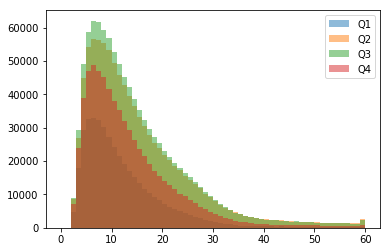

In [5]:
plt.hist(Q1["Duration"], bins=np.arange(61), alpha=0.5, label='Q1')
plt.hist(Q2["Duration"], bins=np.arange(61), alpha=0.5, label='Q2')
plt.hist(Q3["Duration"], bins=np.arange(61), alpha=0.5, label='Q3')
plt.hist(Q4["Duration"], bins=np.arange(61), alpha=0.5, label='Q4')

plt.legend(loc='upper right')
plt.show()

Here we can see that for quarters the duration of rides is skewed to the right, which makes intuitive sense. However, the dates the for the quarters are not split along seasons, thus to get a more informative plot of ride duration by season we need to combine all the quarters and add a new attribute "Season" which I will define as follows:
- Spring: March 1 to May 31 (Season 0)
- Summer: June 1 to August 31 (Season 1)
- Fall: September 1 to November 30 (Season 2)
- Winter: December 1 to February 28/29 (Season 3)
I am going to use the assumption that ride season can be classified by the month of their start date.

In [6]:
def date_to_season(date):
    m = date.month
    if (m == 12 or m == 1 or m == 2):
        return "Winter"
    if (m == 3 or m == 4 or m == 5):
        return "Spring"
    if (m == 6 or m == 7 or m == 8):
        return "Summer"
    if (m == 9 or m == 10 or m == 11):
        return "Fall"
    

AllTrips = pd.concat([Q1, Q2, Q3, Q4])
AllTrips["Season"] = AllTrips["Start date"].apply(date_to_season)

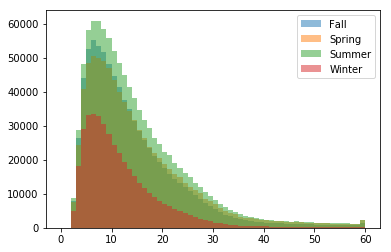

In [7]:
for season, data in AllTrips.groupby("Season"):
    plt.hist(data["Duration"], bins=np.arange(61), alpha=0.5, label=season)
    
plt.legend(loc='upper right')
plt.show()

We can see that greater than 2 overlapping colors the histograms are very unreadable. Thus making these subplots with the same axis is going to make the visualization much more meaningful.

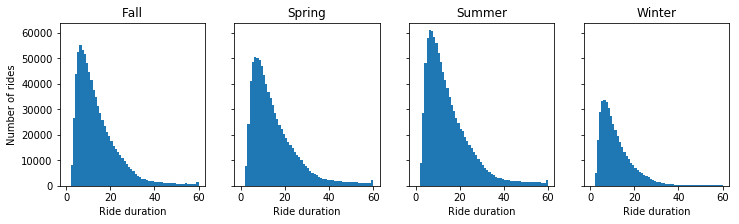

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True,figsize=(12,3))

for ((season, data), ax) in zip(AllTrips.groupby("Season"), axes.flatten()):
    ax.set_title(season)
    ax.hist(data["Duration"], bins=np.arange(61))
    ax.set_xlabel('Ride duration')
    if (season == "Fall"):
        ax.set_ylabel('Number of rides')
    
# fig.tight_layout()
plt.show()

These plots are beginning to be a little more informative of the bike share data user base. We can see that the distribution of ride duration vs number of rides per season. We can see that this distribution is about the same for all seasons with the exception that the number of rides in winter is significantly lower.

## Rider Type

The capital bike share allows for paid and non paid usage of their bikes. We can analyze how difference in customer affects the usage of their bikes. It would be interesting to see how paid members use the bikes differently. We could, for example, hypothesize that paid members would use the bikes more on weekdays for things such as commuting while casual users might ride more on leisure days (weekends). Here I first add two new columns to the data:
- Type of day: weekend or weekday
- Day: 0-6 (Monday through Sunday)

In [9]:
def day_to_weekend(date):
    d = date.weekday()
    if (d < 5):
        return "weekday"
    return "weekend"

AllTrips['Type of day'] = AllTrips["Start date"].apply(day_to_weekend)
AllTrips['Day'] = AllTrips["Start date"].dt.weekday

We can now group the data by member type and day of the week to see how paying vs non paying member usage differs.

In [10]:
temp = AllTrips.groupby(['Member type', 'Day'])
D = {}
M = []
C = []
for t,v in temp:
    D[t] = v.count()['Day']
    if (t[0] == 'Casual'):
        C.append(D[t])
    else:
        M.append(D[t])

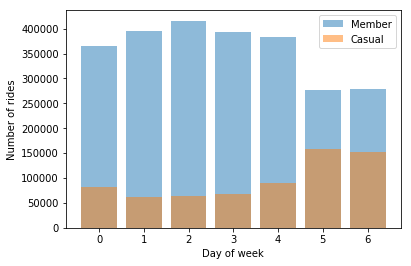

In [11]:
days = [0, 1, 2, 3, 4, 5, 6]
plt.bar(days, M, alpha = .5, label='Member')
plt.bar(days, C, alpha = .5, label='Casual')
plt.legend(loc='upper right')
plt.xlabel("Day of week")
plt.ylabel("Number of rides")
plt.show()

This bar graph is interesting because it shows that casual riders tend to ride on the weekend more often while paying members tend to ride more on weekdays.

Another interesting statistic to view would be comparing the start time of trips of members vs non members.

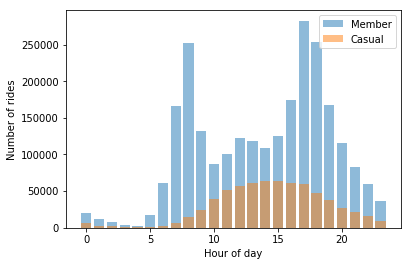

In [12]:
MHours = [0]*24
CHours = [0]*24
hours = [x for x in range(24)]
for t, v in AllTrips.groupby([AllTrips['Start date'].dt.hour,'Member type']):
    if (t[1] == "Casual"):
        CHours[t[0]] = v.count()['Start date']
    else:
        MHours[t[0]] = v.count()['Start date']        
        
plt.bar(hours, MHours, alpha = .5, label='Member')
plt.bar(hours, CHours, alpha = .5, label='Casual')
plt.legend(loc='upper right')

plt.xlabel("Hour of day")
plt.ylabel("Number of rides")
plt.show()

Not surprisingly we can see that members have a bimodal distribution with two modes around 6-8 AM and 5-6PM which makes sense because those are when people tend to commute to and from work. We also see that for casual riders a more gradual unimodal distribution centered around the middle of the day, this also makes sense for leisure riders who are not using the service to consistently travel to and from work.

We can look a little deeper into the members/casual usage and plot the number of rides per hour per day to see if this bimodal distribution holds for both the weekdays and weekends.

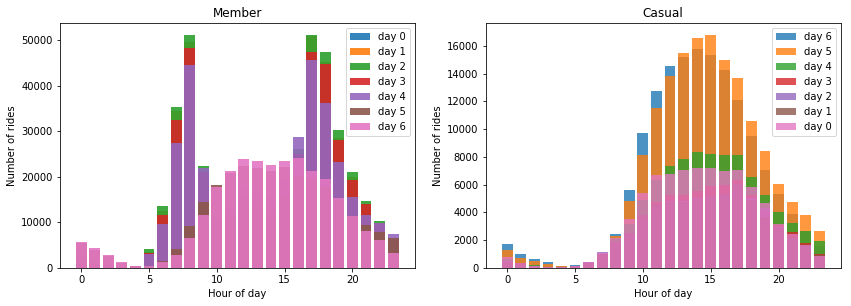

In [13]:
MHours = [[0 for x in range(24)] for y in range(7)] 
CHours = [[0 for x in range(24)] for y in range(7)]
hours = [x for x in range(24)]
for t, v in AllTrips.groupby([AllTrips['Start date'].dt.hour,'Member type','Day']):
    if (t[1] == "Casual"):
        CHours[t[2]][t[0]] = v.count()['Start date']
    else:
        MHours[t[2]][t[0]]  = v.count()['Start date']        

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14,4.5))
for day in range(7):
    axes[0].bar(hours, MHours[day], alpha = .9, label="day " + str(day))
axes[0].set_xlabel('Hour of day')
axes[0].set_ylabel('Number of rides')
axes[0].legend(loc='upper right')
axes[0].set_title('Member')

for day in range(7):
    axes[1].bar(hours, CHours[6-day], alpha = .8, label="day " + str(6-day))
axes[1].set_xlabel('Hour of day')
axes[1].set_ylabel('Number of rides')
axes[1].legend(loc='upper right')
axes[1].set_title('Casual')

plt.show()

This is interesting because it shows that for members the bimodal distribution only holds on weekdays and then on weekends the distribution becomes almost identical to the casual users (except with actual number of rides being still quite larger). This shows that the members use the service to commute on weekdays but then on weekends use the service in a similar leisurely manner as the casual users.

## Heatmaps

Another interesting feature in the capital bike share is the location associated with the start and the end of trips. Since all of the data is centered in DC we can visualize a large amount by looking at a heat map of the trips start and end locations with respect to different variables. First we need to write a function to plot a heatmap for a given pandas dataframe.

We can use the gmaps api to interact with Google Maps. First to install gmaps run in the terminal:

    $ easy_install gmaps
   
Once you install gmaps you also need to get a [Google Maps API key](https://developers.google.com/maps/documentation/javascript/get-api-key). Simply click the "get a key" button and copy the given key to use below.

In [14]:
import gmaps
API_KEY="" # Removed my API key, you can generate your own following the above link
gmaps.configure(api_key=API_KEY)

The gmaps API uses longitude and latitude pairs, however the capital bike share data does not naturally have this information embedded. Thus to use this API we will need to map each bike share terminal to a longitude latitude pair. Conveniently we can download the [locations](http://opendata.dc.gov/datasets/capital-bike-share-locations) of all of the capital bike share terminals. This dataset has more information in it than we need. All that is left to do is match the TERMINAL_NUMBERs in both dataframes. We can use the head command again to see what columns we are dealing with.

In [15]:
locs = pd.read_csv("Capital_Bike_Share_Locations.csv")
locs.head()

,OBJECTID,ID,ADDRESS,TERMINAL_NUMBER,LATITUDE,LONGITUDE,INSTALLED,LOCKED,INSTALL_DATE,REMOVAL_DATE,TEMPORARY_INSTALL,NUMBER_OF_BIKES,NUMBER_OF_EMPTY_DOCKS,X,Y,SE_ANNO_CAD_DATA
0,195050750,432,Tysons West Transit Center,32208,38.932636,-77.231825,YES,NO,NaN,NaN,NO,8,3,379899.825354,140553.691849,NaN
1,195050751,433,North Shore & Cameron Crescent Dr/Crescent Apa...,32209,38.970046,-77.338686,YES,NO,NaN,NaN,NO,5,6,370649.983161,144735.464934,NaN
2,195050752,434,Town Center Pkwy & Bowman Towne Dr,32210,38.962524,-77.361902,YES,NO,NaN,NaN,NO,11,4,368634.819597,143908.178687,NaN
3,195050753,435,Reston Regional Library,32211,38.962095,-77.358815,YES,NO,NaN,NaN,NO,7,8,368902.173933,143859.499939,NaN
4,195050754,436,New Dominion Pkwy & Fountain Dr,32212,38.960574,-77.356324,YES,NO,NaN,NaN,NO,9,6,369117.404104,143689.810457,NaN


The gmaps API needs a tuple of (lat,long) pairs, thus we need to combine these columns in this new dataframe.

In [16]:
temp = pd.DataFrame()
temp['Pairs'] = list(zip(locs['LATITUDE'], locs['LONGITUDE']))
temp['TERMINAL_NUMBER'] = locs['TERMINAL_NUMBER']
AllTripsWithLocs = AllTrips.merge(temp, left_on='Start station number', right_on='TERMINAL_NUMBER')
AllTripsWithLocs.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Season,Type of day,Day,Pairs,TERMINAL_NUMBER
0,40,2015-01-01 00:02:44,2015-01-01 00:42:33,31271,Constitution Ave & 2nd St NW/DOL,31254,15th & K St NW,W01140,Casual,Winter,weekday,3,"(38.892275, -77.013917)",31271
1,40,2015-01-01 00:02:46,2015-01-01 00:42:41,31271,Constitution Ave & 2nd St NW/DOL,31254,15th & K St NW,W00612,Casual,Winter,weekday,3,"(38.892275, -77.013917)",31271
2,16,2015-01-01 07:10:06,2015-01-01 07:26:06,31271,Constitution Ave & 2nd St NW/DOL,31240,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,W20844,Casual,Winter,weekday,3,"(38.892275, -77.013917)",31271
3,48,2015-01-01 12:29:11,2015-01-01 13:16:24,31271,Constitution Ave & 2nd St NW/DOL,31271,Constitution Ave & 2nd St NW/DOL,W01022,Casual,Winter,weekday,3,"(38.892275, -77.013917)",31271
4,47,2015-01-01 12:29:30,2015-01-01 13:16:21,31271,Constitution Ave & 2nd St NW/DOL,31271,Constitution Ave & 2nd St NW/DOL,W01350,Casual,Winter,weekday,3,"(38.892275, -77.013917)",31271


Now that we generated all of the (lat, long) pairs for the different stations we can make a heat map to see where they are. Below I have made a heat map for all of the locations offered by the capital bike share. This is unrelated to the actual data on any given day.

Below for all of the maps I have included already rendered screenshots and commented out the "fig" line because these have problems rendering. To run render these maps locally simply uncomment the "fig" line before each map.

In [17]:
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(temp['Pairs']))
#fig

<img src="ss1.png">

Now that we have familiarized ourselves with the gmaps API we can delve into the different locations used by different types of user. 

First I am going to plot the stations used by all of the casual riders in the dataset.

In [18]:
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(AllTripsWithLocs[AllTripsWithLocs['Member type'] == 'Casual']['Pairs']))
#fig

<img src="ss2.png">

We can compare this to all of the stations used by paid members.

In [19]:
fig = gmaps.figure()
Members = AllTripsWithLocs['Member type'] == 'Member'
Casuals = AllTripsWithLocs['Member type'] == 'Casual'
Weekdays =  AllTripsWithLocs['Type of day'] == 'weekday'
Weekends =  AllTripsWithLocs['Type of day'] == 'weekend'
fig.add_layer(gmaps.heatmap_layer(AllTripsWithLocs[Members]['Pairs']))
#fig

<img src="ss3.png">

Not surprisingly we can see that the paid members use a much larger subset and are more active in the city than the non paid members. However this leads us to question if we can see any differences between paid members on the weekend vs not on the weekend, with the hypothesis being that this service could be used differently to commute vs for leisure.

In [20]:
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(AllTripsWithLocs[Members & Weekdays]['Pairs']))
#fig

<img src="ss4.png">

Likewise we can generate a heat map for members on weekends.

In [21]:
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(AllTripsWithLocs[Members & Weekends]['Pairs']))
#fig

<img src="ss5.png">

Although these two heat maps are quite similar, one could delve deeper and split the data up by even more variables such as start time and see how the locations of use changes over time.

Datasets Used: 
Capital bike share dataset: https://www.capitalbikeshare.com/system-data

Capital bike share location dataset: http://opendata.dc.gov/datasets/capital-bike-share-locations